In [1]:
import numpy as np
import pandas as pd
import pyreadstat 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
df, meta= pyreadstat.read_sav("cleaned_survey.sav")

In [175]:
# df

In [4]:
# df['英語自評能力'].mean() #2.74
sum(df['英語自評能力'] >= 2.7) #278 人
sum(df['英語自評能力'] < 2.7) #168 人

168

In [3]:
#分成高低兩類 高分>=2.7和低分 <2.7

for i in range(446):
    if df.loc[i,'英語自評能力'] >= 2.7:
        df.loc[i,"能力高於或低於平均"] = 0 #低分 <2.7
    else:
        df.loc[i,"能力高於或低於平均"] = 1 #高分 >=2.7
# df

In [4]:
df.head(3)

,性別,年級,教育,補習,英檢,父教,母教,收入,自1,自2,...,能力5,社經地位,自律學習,時間規劃,內在動機,外在動機,自信心,英語自評能力,內在動機平均X外在動機平均,能力高於或低於平均
0,1.0,3.0,2.0,2.0,3.0,5.0,5.0,3.0,4.0,4.0,...,3.0,5.0,4.0,4.0,3.0,3.00,3.0,3.0,9.0,0.0
1,1.0,2.0,3.0,4.0,3.0,4.0,4.0,4.0,3.0,3.0,...,4.0,4.0,3.0,3.0,3.2,3.75,3.6,3.6,12.0,0.0
2,0.0,3.0,2.0,1.0,3.0,5.0,5.0,4.0,2.0,2.0,...,2.0,5.0,2.4,4.0,2.4,4.00,2.4,2.2,9.6,1.0


In [24]:
x = df.loc[:,["社經地位","時間規劃","自信心","內在動機"]]
x.columns = ["Socioeconomic","time management","confidence","motivation"]
# x.columns
y = df["能力高於或低於平均"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.2)

In [31]:
model = RandomForestClassifier(n_estimators=10)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [32]:
result = model.predict(X_test)
# result

In [33]:
#accuracy
sum(y_test == result)/len(y_test) *100

81.11111111111111

In [121]:
from sklearn.tree import export_graphviz

In [127]:
model.estimators_ #10個決策樹

[DecisionTreeClassifier(max_depth=4, max_features='sqrt', random_state=626426611),
 DecisionTreeClassifier(max_depth=4, max_features='sqrt', random_state=643692959),
 DecisionTreeClassifier(max_depth=4, max_features='sqrt', random_state=158917838),
 DecisionTreeClassifier(max_depth=4, max_features='sqrt', random_state=40722480),
 DecisionTreeClassifier(max_depth=4, max_features='sqrt',
                        random_state=1278348870),
 DecisionTreeClassifier(max_depth=4, max_features='sqrt',
                        random_state=1542850551),
 DecisionTreeClassifier(max_depth=4, max_features='sqrt', random_state=610691063),
 DecisionTreeClassifier(max_depth=4, max_features='sqrt',
                        random_state=1325017436),
 DecisionTreeClassifier(max_depth=4, max_features='sqrt', random_state=257522153),
 DecisionTreeClassifier(max_depth=4, max_features='sqrt',
                        random_state=1093532717)]

In [123]:
# Extract single tree 選擇十顆中的一顆樹來畫圖
estimator = model.estimators_[5]
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = ["Socioeconomic","time management","confidence","motivation"],
                class_names = ["low","high"],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [95]:
# Convert to png using system command (requires Graphviz)
from subprocess import call

In [124]:
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

0

In [75]:
from IPython.display import Image

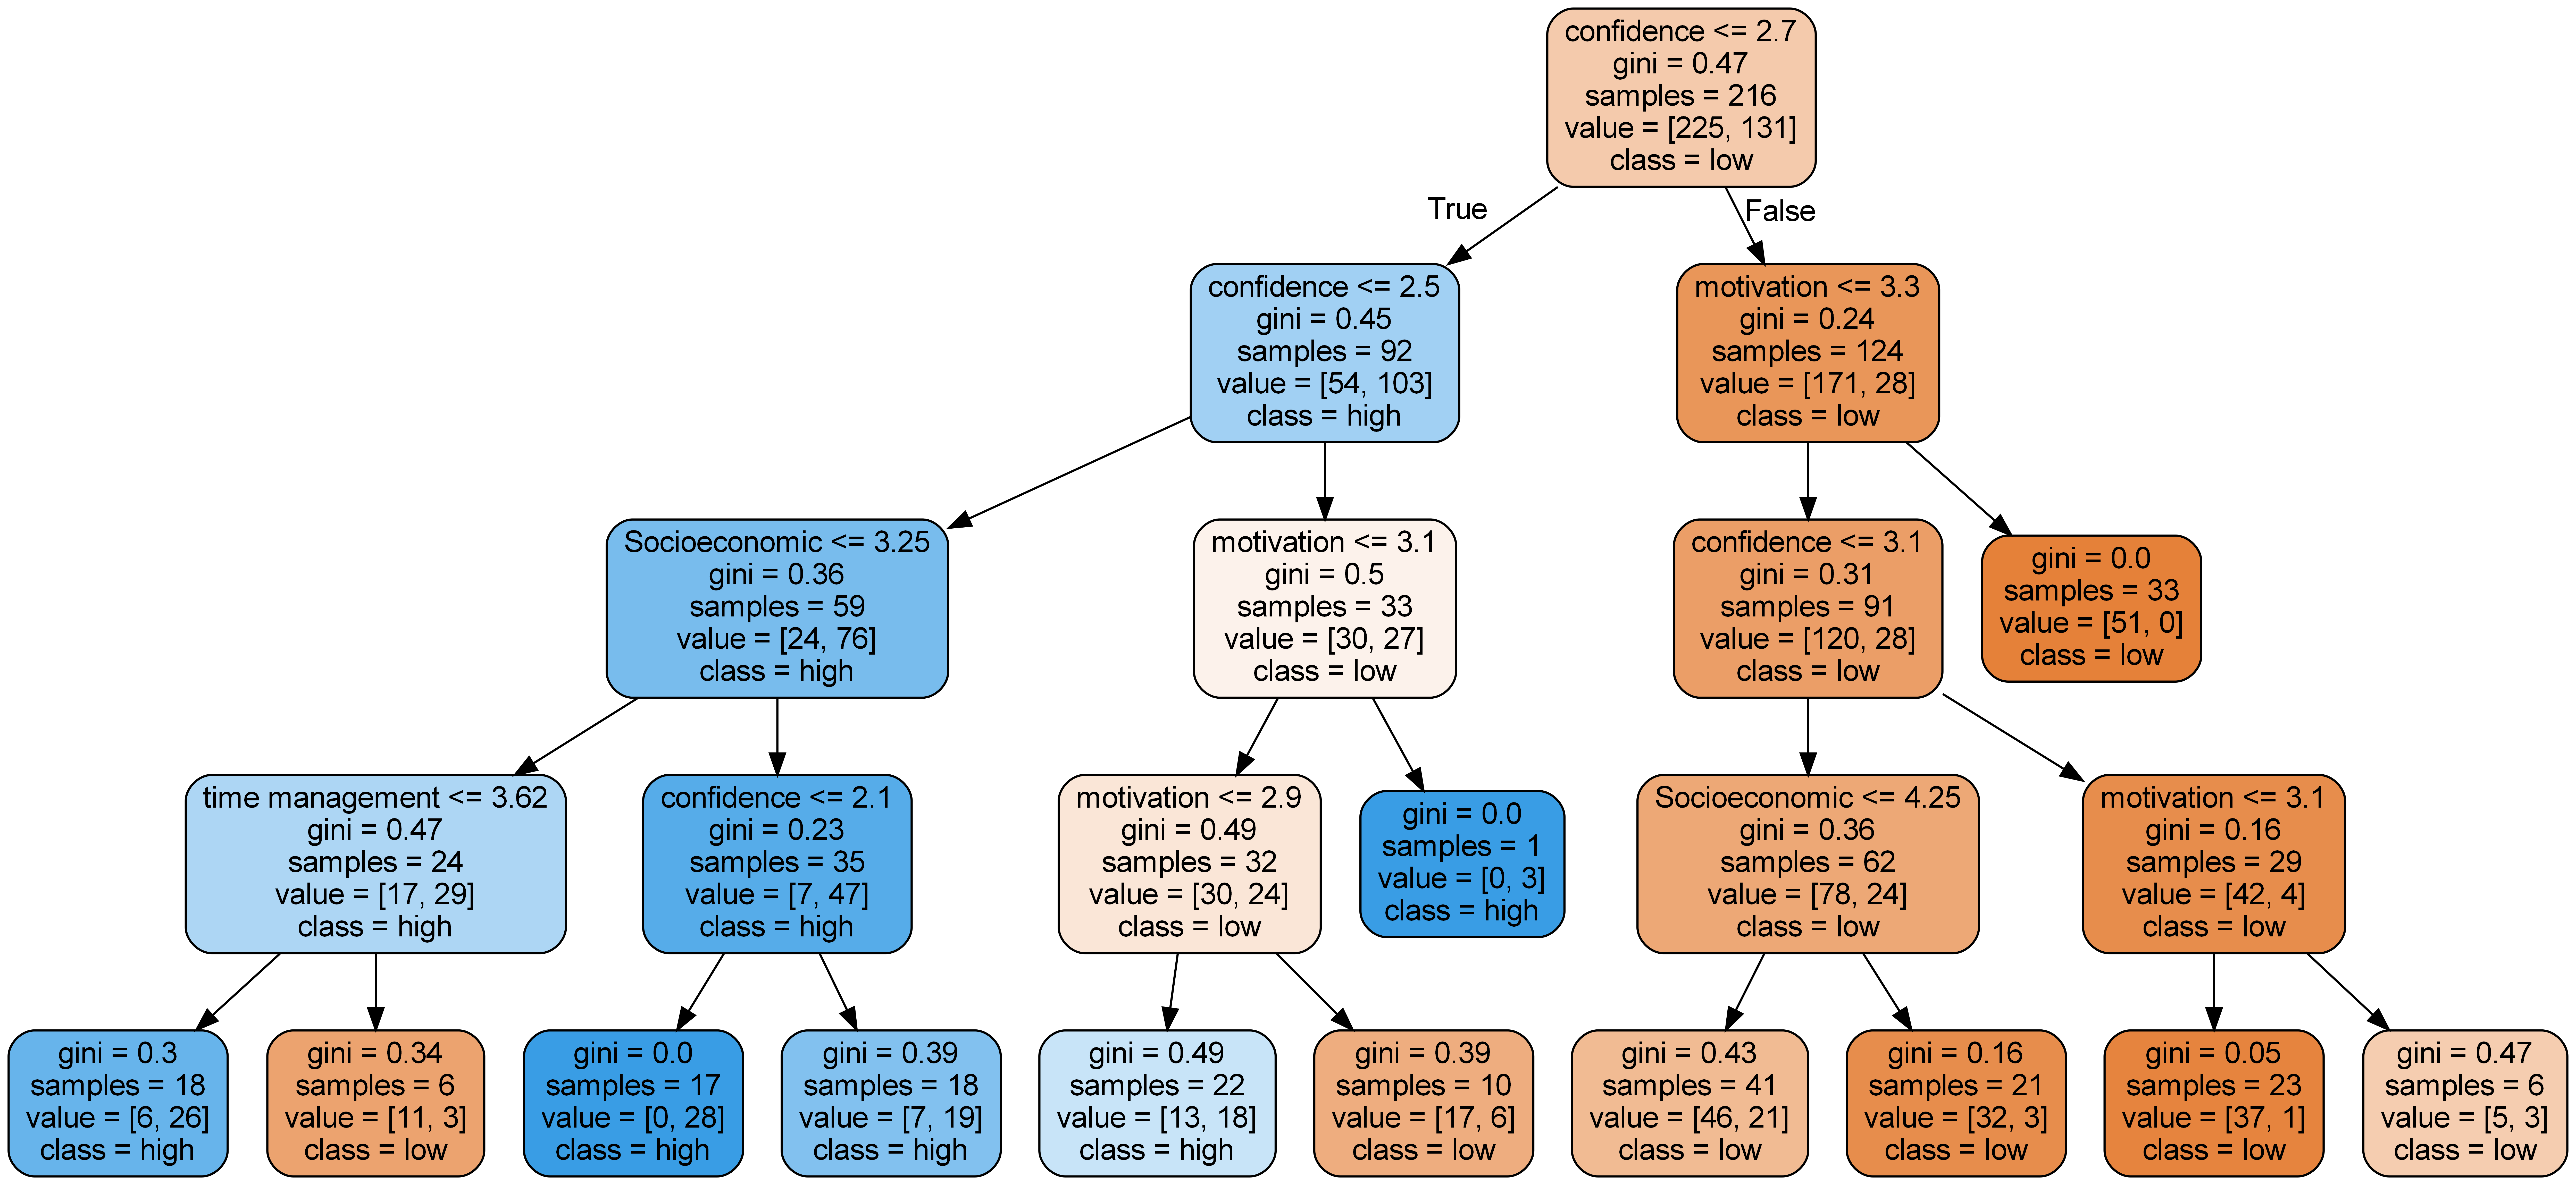

In [125]:
Image(filename = 'tree.png')